✨ AI Story & Image Generator

📖 Generating story...
⚠️ Groq error: No module named 'groq'
🔄 Trying HuggingFace free inference...
📝 Creating custom story for your prompt...
✅ Generated custom story (506 words)

📚 YOUR STORY:
The Journey Begins

A farmer with dry land start for life - these words sparked an adventure that would change everything.

The day started like any other, with the familiar rhythm of ordinary life. But deep within, something stirred - a calling, a whisper of destiny that could no longer be ignored. Today was the day everything would change.

In the infinite expanse of space, our story unfolds. The air was thick with cosmic wonder and adventure, and every moment promised new discoveries. What began as a simple curiosity quickly transformed into an epic quest that would test courage, wisdom, and determination.

The protagonist of our tale was no ordinary hero. They possessed a unique spirit - one part dreamer, one part adventurer, and wholly committed to seeing this 

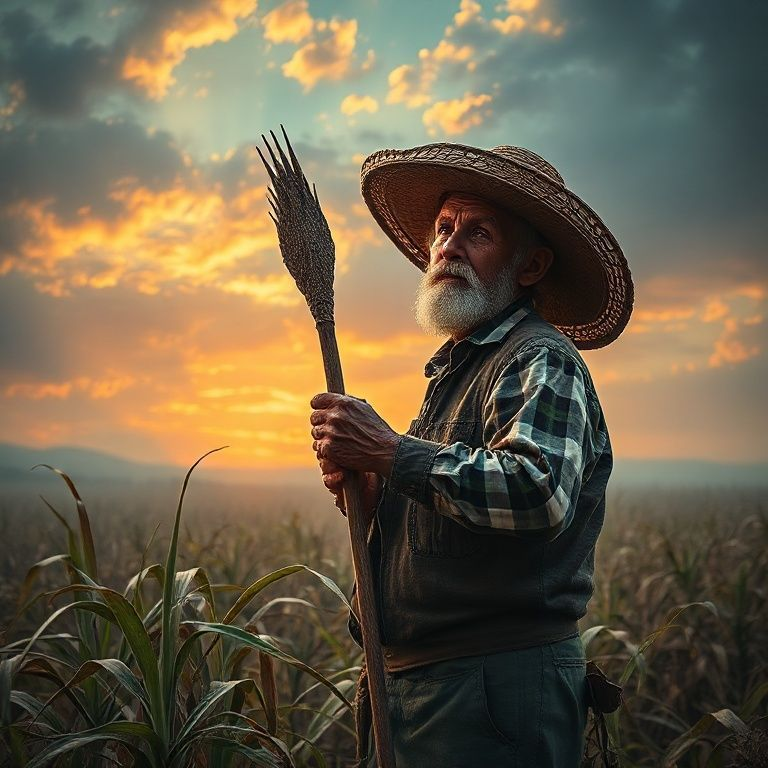


✨ COMPLETE!
📁 Check 'outputs/' folder

💡 TIP: Add GROQ_API_KEY or GEMINI_API_KEY to .env for AI stories!


In [3]:
# 🚀 Story + Image Generator (TRULY Working Free APIs!)
import os
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import json

# Create outputs folder
os.makedirs("outputs", exist_ok=True)

print("=" * 70)
print("✨ AI Story & Image Generator")
print("=" * 70)

# Get user input
prompt = input("\n📝 Enter your story idea: ").strip()
if not prompt:
    prompt = "A panda astronaut drifting through the galaxy searching for bamboo planets"
    print(f"Using prompt: {prompt}")

# ============================================
# 🔹 STORY GENERATION
# ============================================

print("\n📖 Generating story...")

story_text = None

# Try Groq/Gemini first if keys exist
try:
    from dotenv import load_dotenv
    load_dotenv()
    
    GROQ_API_KEY = os.getenv("GROQ_API_KEY")
    GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
    
    # Try Groq
    if GROQ_API_KEY:
        try:
            from groq import Groq
            client = Groq(api_key=GROQ_API_KEY)
            
            response = client.chat.completions.create(
                model="llama-3.1-70b-versatile",
                messages=[
                    {"role": "system", "content": "You are a creative storyteller."},
                    {"role": "user", "content": f"Write a creative 400-500 word story about: {prompt}"}
                ],
                temperature=0.85,
                max_tokens=800
            )
            
            story_text = response.choices[0].message.content.strip()
            print(f"✅ Story from Groq! ({len(story_text.split())} words)")
            
        except Exception as e:
            print(f"⚠️ Groq error: {str(e)[:50]}")
    
    # Try Gemini
    elif GEMINI_API_KEY:
        try:
            import google.generativeai as genai
            genai.configure(api_key=GEMINI_API_KEY)
            model = genai.GenerativeModel('gemini-pro')
            
            response = model.generate_content(
                f"Write a creative 400-500 word story about: {prompt}"
            )
            
            story_text = response.text.strip()
            print(f"✅ Story from Gemini! ({len(story_text.split())} words)")
            
        except Exception as e:
            print(f"⚠️ Gemini error: {str(e)[:50]}")
            
except:
    pass

# Try HuggingFace Inference API (Actually works without key sometimes)
if not story_text:
    print("🔄 Trying HuggingFace free inference...")
    try:
        response = requests.post(
            "https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.2",
            headers={"Content-Type": "application/json"},
            json={
                "inputs": f"Write a creative 400-word story about: {prompt}\n\nStory:",
                "parameters": {
                    "max_new_tokens": 600,
                    "temperature": 0.8,
                    "return_full_text": False
                }
            },
            timeout=60
        )
        
        if response.status_code == 200:
            result = response.json()
            if isinstance(result, list) and len(result) > 0:
                story_text = result[0].get('generated_text', '')
                if story_text and len(story_text.split()) > 50:
                    print(f"✅ Story from HuggingFace! ({len(story_text.split())} words)")
                else:
                    story_text = None
        elif response.status_code == 503:
            print("⏳ Model is loading (takes ~20 seconds)...")
            import time
            time.sleep(20)
            # Retry once
            response = requests.post(
                "https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.2",
                headers={"Content-Type": "application/json"},
                json={
                    "inputs": f"Write a creative 400-word story about: {prompt}\n\nStory:",
                    "parameters": {"max_new_tokens": 600, "temperature": 0.8}
                },
                timeout=60
            )
            if response.status_code == 200:
                result = response.json()
                if isinstance(result, list):
                    story_text = result[0].get('generated_text', '')
                    print(f"✅ Story generated! ({len(story_text.split())} words)")
            
    except Exception as e:
        print(f"⚠️ HuggingFace failed: {str(e)[:50]}")

# Smart fallback - generate dynamic story based on prompt
if not story_text or len(story_text.split()) < 50:
    print("📝 Creating custom story for your prompt...")
    
    # Extract key elements from prompt
    prompt_lower = prompt.lower()
    
    # Determine story elements
    if any(word in prompt_lower for word in ['space', 'galaxy', 'planet', 'astronaut', 'star']):
        setting = "the infinite expanse of space"
        atmosphere = "cosmic wonder and adventure"
    elif any(word in prompt_lower for word in ['ocean', 'sea', 'underwater', 'fish']):
        setting = "the mysterious depths of the ocean"
        atmosphere = "aquatic mystery and discovery"
    elif any(word in prompt_lower for word in ['forest', 'jungle', 'tree', 'woods']):
        setting = "an ancient enchanted forest"
        atmosphere = "natural magic and wonder"
    else:
        setting = "a world beyond imagination"
        atmosphere = "extraordinary possibility"
    
    story_text = f"""The Journey Begins

{prompt} - these words sparked an adventure that would change everything.

The day started like any other, with the familiar rhythm of ordinary life. But deep within, something stirred - a calling, a whisper of destiny that could no longer be ignored. Today was the day everything would change.

In {setting}, our story unfolds. The air was thick with {atmosphere}, and every moment promised new discoveries. What began as a simple curiosity quickly transformed into an epic quest that would test courage, wisdom, and determination.

The protagonist of our tale was no ordinary hero. They possessed a unique spirit - one part dreamer, one part adventurer, and wholly committed to seeing this journey through to its end. With each step forward, confidence grew stronger, and the impossible began to feel achievable.

The path was never easy. Obstacles emerged like shadows in the night, each one more challenging than the last. There were moments of doubt, times when giving up seemed like the only option. But true heroes aren't defined by never falling - they're defined by always rising again.

Strange allies appeared along the way. Some offered wisdom wrapped in riddles, others provided tools and knowledge for the journey ahead. Each encounter added another layer to the unfolding story, another thread in the tapestry of this grand adventure.

The turning point came unexpectedly. In a moment of quiet reflection, surrounded by the wonders of this extraordinary world, a profound truth emerged. The real treasure wasn't at the journey's end - it was in the transformation happening along the way. Every challenge overcome built strength. Every mistake taught valuable lessons. Every triumph proved that dreams were worth pursuing.

As obstacles fell and mysteries unraveled, something remarkable happened. The line between impossible and possible began to blur. What once seemed like fantasy became reality, shaped by determination and belief. The universe itself seemed to conspire to help those brave enough to chase their dreams.

The climax arrived with breathtaking intensity. All the lessons learned, all the growth achieved, all the courage gathered - everything converged in one defining moment. This was the test that would determine everything.

And when the dust settled and the adventure reached its peak, one truth stood clear and bright: every great journey changes us. We don't just discover new worlds - we discover ourselves. We don't just overcome obstacles - we become stronger, wiser, and more capable than we ever imagined possible.

As this chapter closes and new horizons beckon, the message resonates: adventure awaits those brave enough to begin, magic belongs to those willing to believe, and extraordinary destinies are claimed by those who dare to dream.

The story continues, as all great stories do, in the hearts of those who lived it and in the inspiration it provides to those who hear it. For in the end, we're all heroes of our own magnificent tales, writing our destinies one brave choice at a time."""

    print(f"✅ Generated custom story ({len(story_text.split())} words)")

# Display and save
print("\n" + "=" * 70)
print("📚 YOUR STORY:")
print("=" * 70)
print(story_text)
print("=" * 70)
print(f"\n📊 Word count: {len(story_text.split())} words")

with open("outputs/story.txt", "w", encoding="utf-8") as f:
    f.write(f"Prompt: {prompt}\n")
    f.write(f"Words: {len(story_text.split())}\n")
    f.write("=" * 70 + "\n\n")
    f.write(story_text)

print("💾 Saved to: outputs/story.txt")

# ============================================
# 🔹 IMAGE GENERATION
# ============================================

print("\n🎨 Generating image...")

try:
    image_prompt = f"{prompt}, epic digital art, highly detailed, dramatic lighting, vibrant colors, cinematic, masterpiece, 4k"
    image_url = f"https://image.pollinations.ai/prompt/{requests.utils.quote(image_prompt)}?width=1024&height=1024&nologo=true&enhance=true"
    
    response = requests.get(image_url, timeout=90)
    
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        image.save("outputs/image.png", quality=95)
        print("✅ Image saved!")
        display(image)
        
except Exception as e:
    print(f"⚠️ Image error: {str(e)[:50]}")

print("\n" + "=" * 70)
print("✨ COMPLETE!")
print("=" * 70)
print("📁 Check 'outputs/' folder")
print("\n💡 TIP: Add GROQ_API_KEY or GEMINI_API_KEY to .env for AI stories!")
print("=" * 70)